In [1]:
import numpy as np
import pandas as pd
from pimmslearn.sklearn.ae_transformer import AETransformer
from pimmslearn.sklearn.cf_transformer import CollaborativeFilteringTransformer
import time
import random

random.seed(10)


In [2]:
fn_intensities = ('../../Data/CPTAC_data/CPTAC_sce.csv')
df = pd.read_csv(fn_intensities, index_col=0)
df = df.T

In [3]:
df.head()

,AAAAGAGGAGDSGDAVTK,AAAALAGGK,AAAALAGGKK,AAADALSDLEIK,AAADALSDLEIKDSK,AAAEEFQR,AAAEGVANLHLDEATGEMVSK,AAALVNK,AAAPAQTTTDYK,AAAPPPVR,...,YYPQQAPMPAAAPQQAYYGTAPSTSK,YYPSYIVSK,YYQPQQPQYPQYPQQQR,YYSASPLPASK,YYSISSSSLSEK,YYSIYDLGNNAVGLAK,YYTFNGPNYNENETIR,YYTITEVATR,YYTVFDRDNNR,YYTVFDRDNNRVGFAEAAR
Intensity.6A_1,NaN,NaN,NaN,1.349,-2.469,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.055,NaN,-0.861,-0.299,NaN,NaN,-0.427,NaN,NaN
Intensity.6A_2,-2.409,5.557,3.651,1.967,-2.722,NaN,NaN,5.331,-0.486,-0.982,...,NaN,-1.110,NaN,-1.263,-0.513,NaN,NaN,NaN,NaN,NaN
Intensity.6A_3,NaN,5.567,NaN,1.869,NaN,NaN,NaN,5.437,-0.837,NaN,...,NaN,NaN,NaN,NaN,-0.912,NaN,NaN,-0.827,NaN,NaN
Intensity.6A_4,-2.563,5.610,3.688,1.927,0.990,NaN,0.412,NaN,-0.763,-0.336,...,0.264,-0.657,-0.255,-1.593,-0.014,-2.757,0.404,NaN,NaN,NaN
Intensity.6A_5,-2.426,-3.100,NaN,2.283,1.201,-0.905,-0.008,NaN,-0.841,NaN,...,-0.980,NaN,NaN,-1.236,0.450,-2.978,-0.489,NaN,NaN,NaN


/data/gent/442/vsc44202/.local/lib/python3.11/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,time
0,8976.773438,None,00:00
1,8955.470703,None,00:00
2,8901.040039,None,00:00
3,8904.172852,None,00:00
4,8844.322266,None,00:00
5,8791.080078,None,00:00
6,8719.716797,None,00:00
7,8641.300781,None,00:00
8,8579.613281,None,00:00
9,8499.549805,None,00:00


64.6922299861908


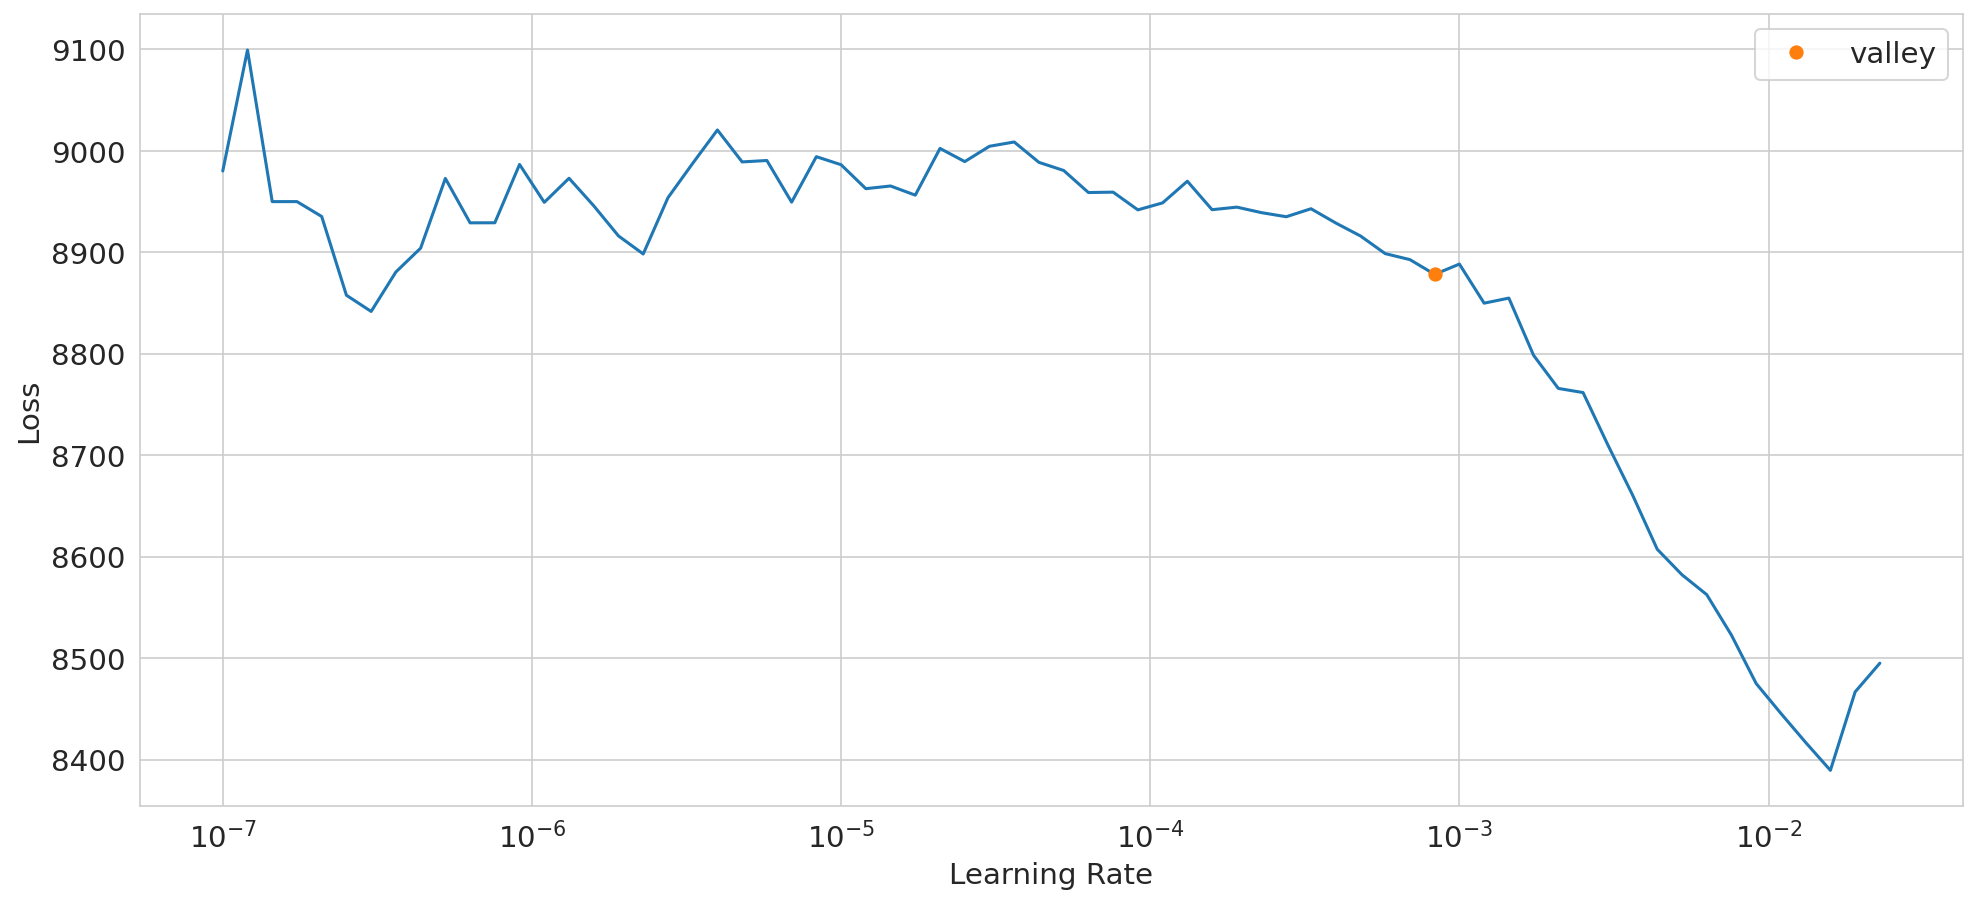

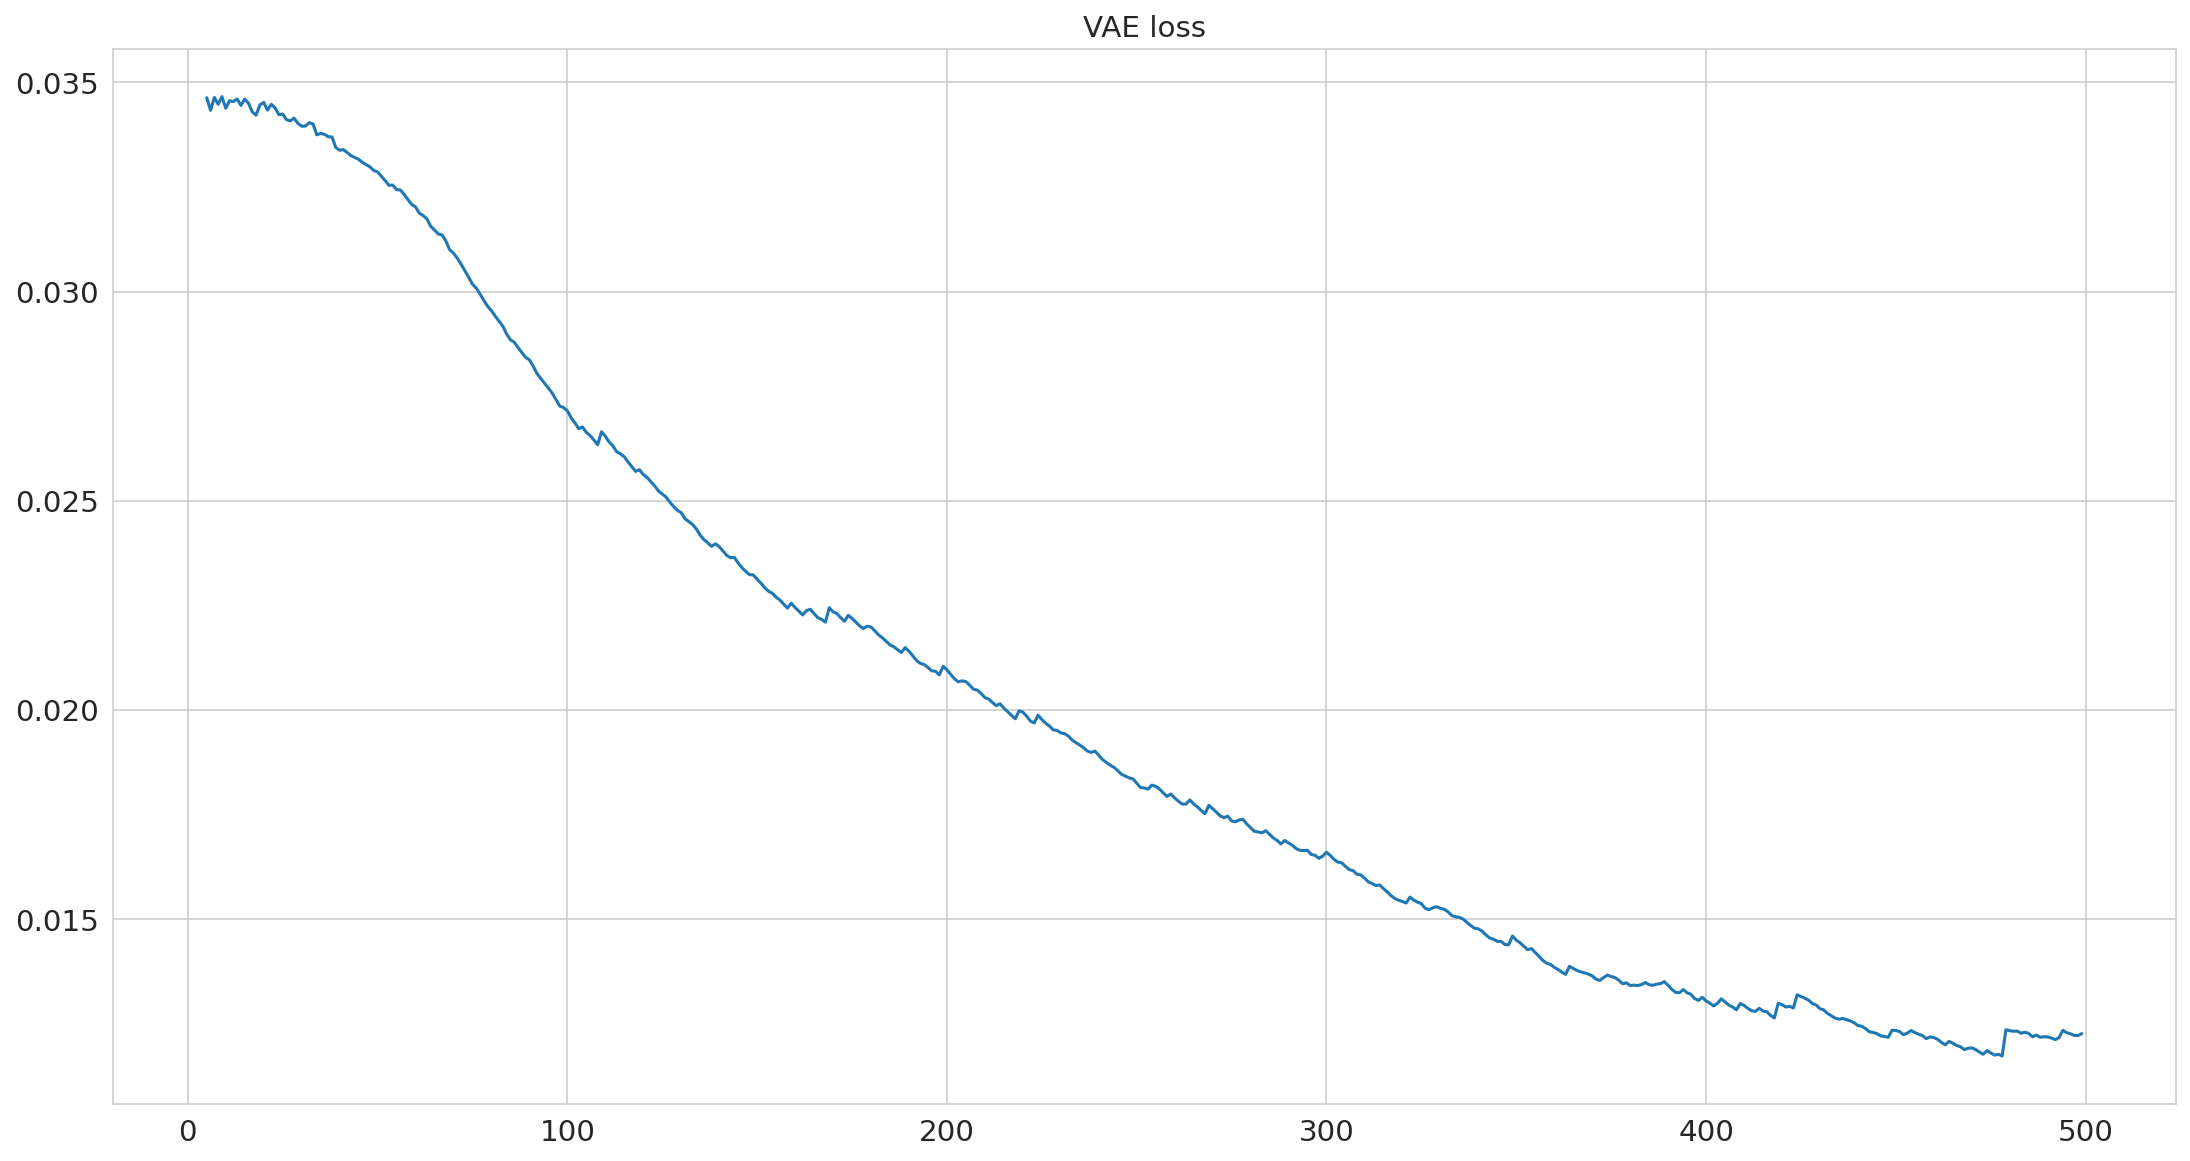

In [4]:
start = time.time()
model = AETransformer(
    model='VAE', # or 'VAE'
    hidden_layers=[512,],
    latent_dim=50, # dimension of joint sample and item embedding
    batch_size=10,
)


model.fit(df,
          cuda=False,
          epochs_max=100,
          )

df_imputed = model.transform(df)

end = time.time()

elapsed_time = end - start
print(elapsed_time)

# Save the elapsed time to a .txt file
with open('Output/time_measurement_VAE_default.txt', 'w') as file:
    file.write(f"Elapsed time: {elapsed_time} seconds\n")

In [15]:
df_imputed.to_csv("Output/VAE_default_sce.csv")


/data/gent/442/vsc44202/.local/lib/python3.11/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,time
0,53021.859375,None,00:00
1,49246.308594,None,00:00
2,45740.695312,None,00:00
3,42614.609375,None,00:00
4,39874.812500,None,00:00
5,37598.613281,None,00:00
6,35387.312500,None,00:00
7,33594.667969,None,00:00
8,31925.962891,None,00:00
9,30482.121094,None,00:00


45.90503907203674


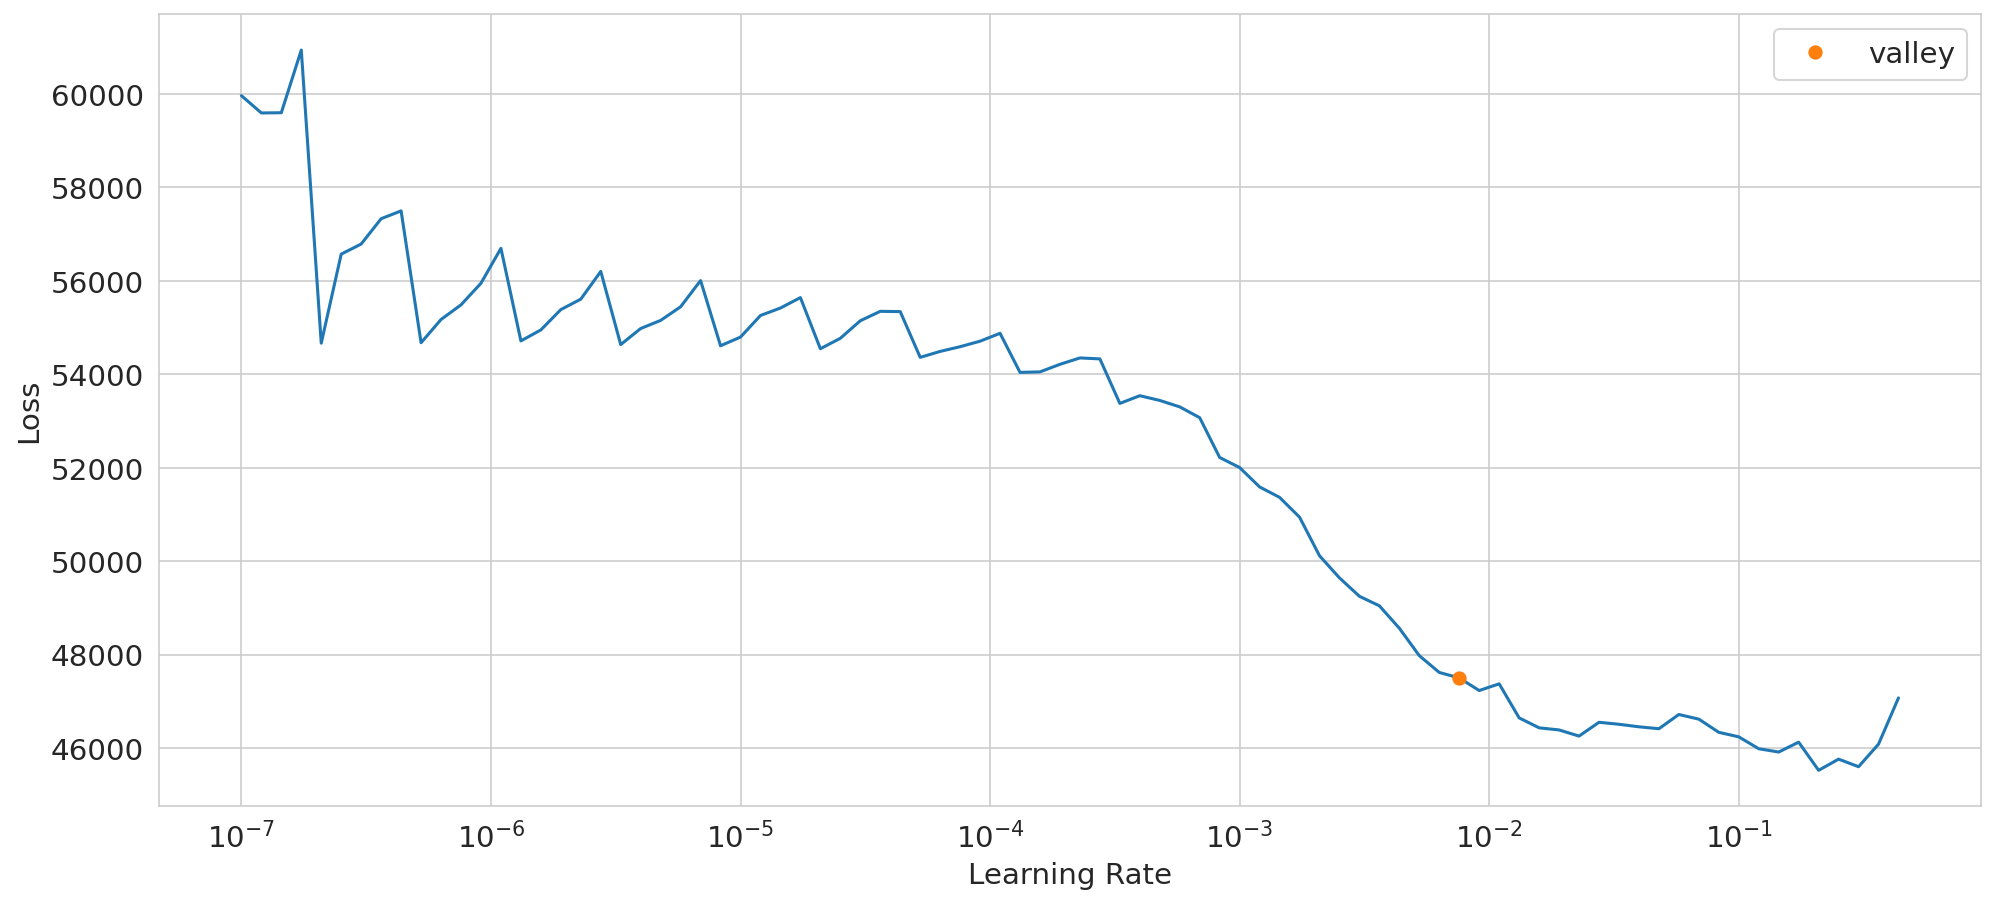

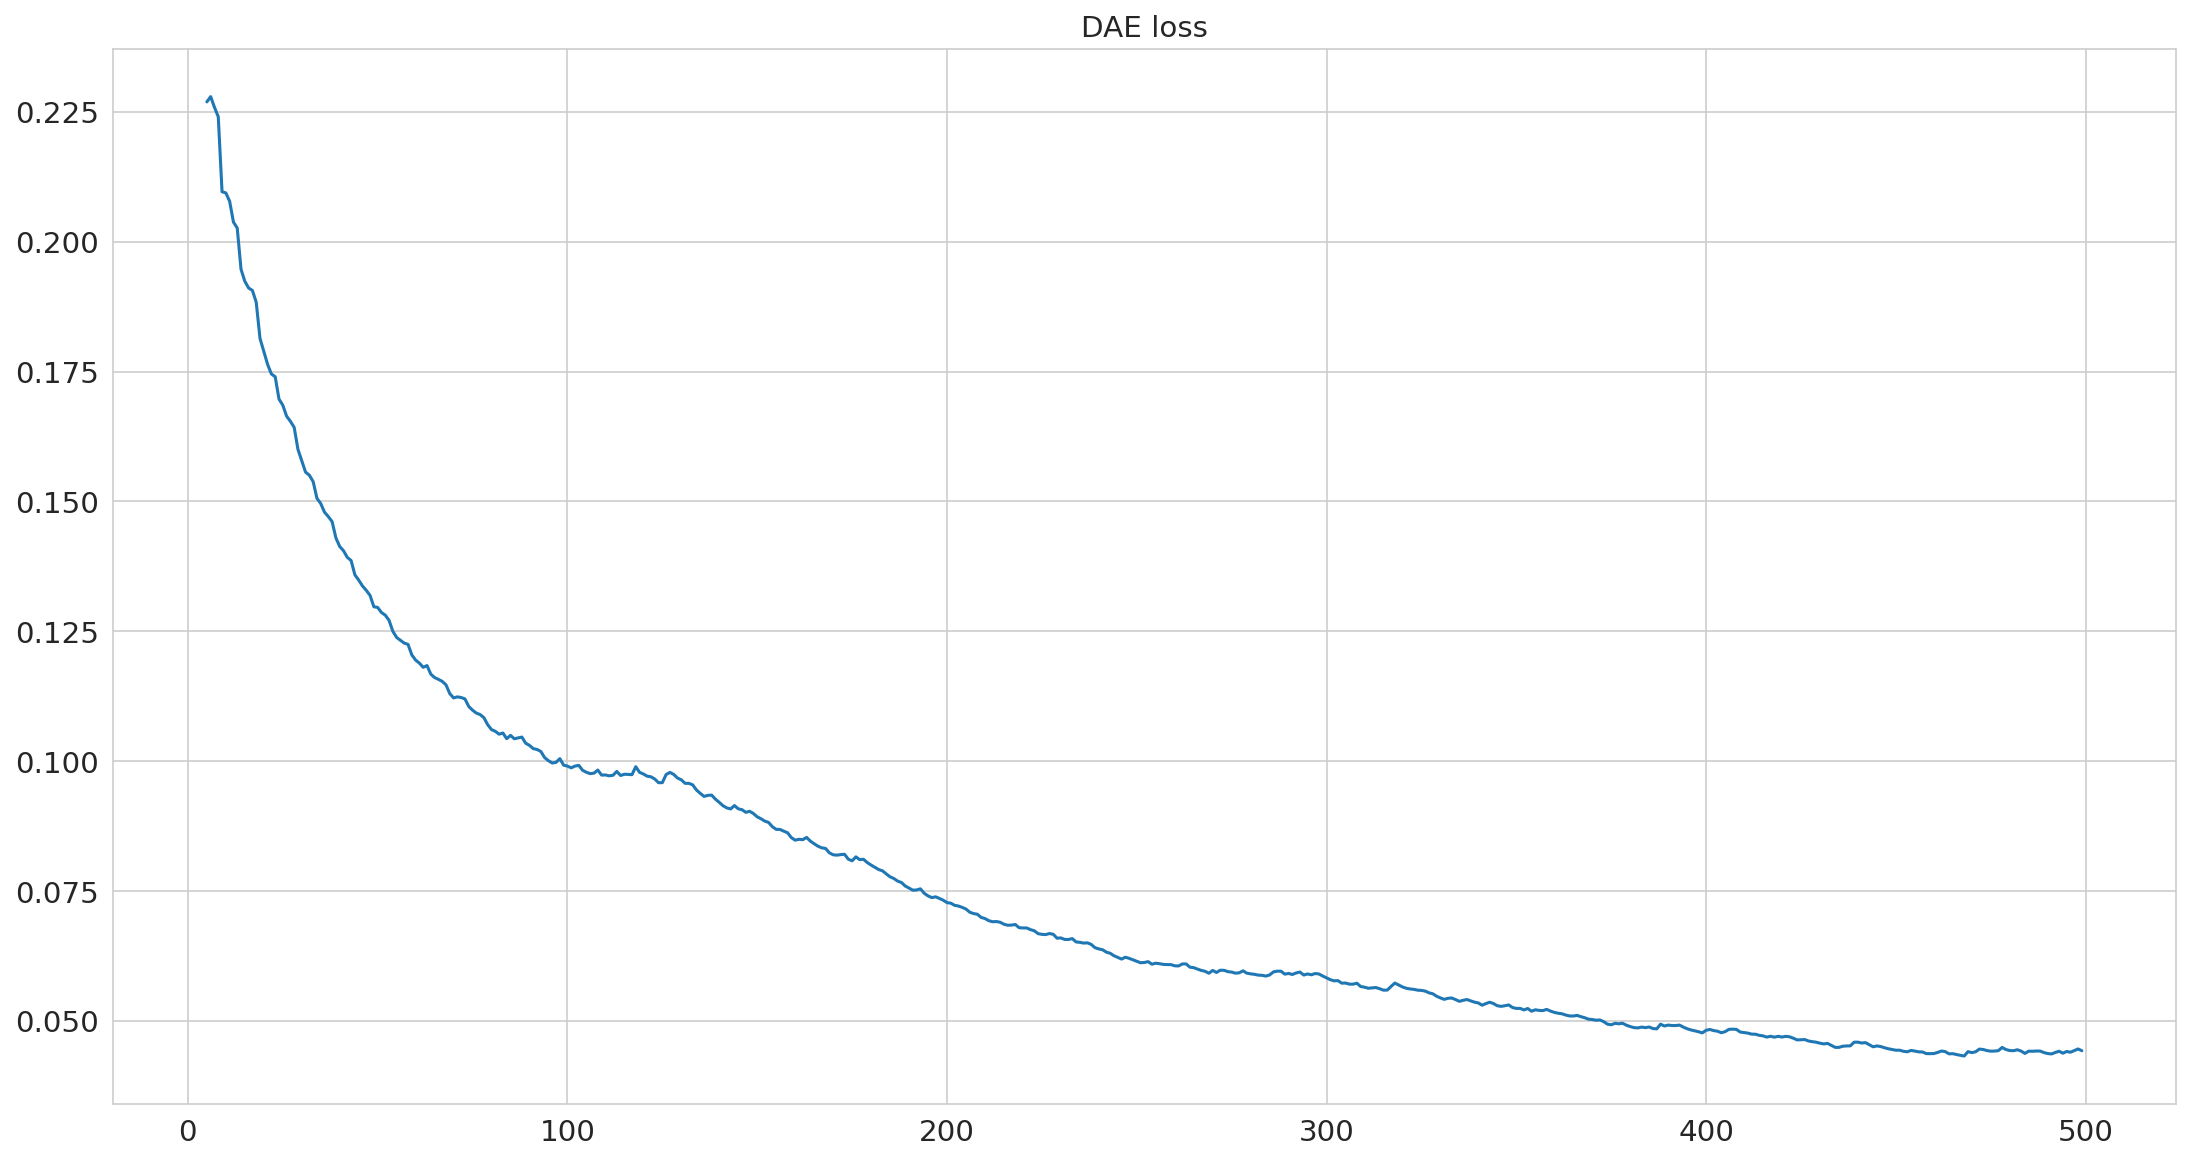

In [18]:
for x in range(1,11):
    fn_intensities = ('../../Data/CPTAC_data/CPTAC_MISTOT10_MNAR25_' + str(x) + '.csv')
    df = pd.read_csv(fn_intensities, index_col=0)
    df = df.T
    
    start = time.time()
    model = AETransformer(
        model='VAE', # or 'VAE'
        hidden_layers=[512,],
        latent_dim=50, # dimension of joint sample and item embedding
        batch_size=10,
    )
    
    
    model.fit(df,
              cuda=False,
              epochs_max=100,
              )
    
    df_imputed = model.transform(df)
    
    end = time.time()
    
    print(end - start)
    
    df_imputed.to_csv("Output/VAE_default_MISTOT10_MNAR25_" + str(x) + ".csv")

/data/gent/442/vsc44202/.local/lib/python3.11/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,time
0,53858.257812,None,00:00
1,51255.503906,None,00:00
2,48554.632812,None,00:00
3,45764.988281,None,00:00
4,42986.578125,None,00:00
5,40414.765625,None,00:00
6,37990.519531,None,00:00
7,36092.058594,None,00:00
8,34283.847656,None,00:00
9,33055.605469,None,00:00


46.015620946884155


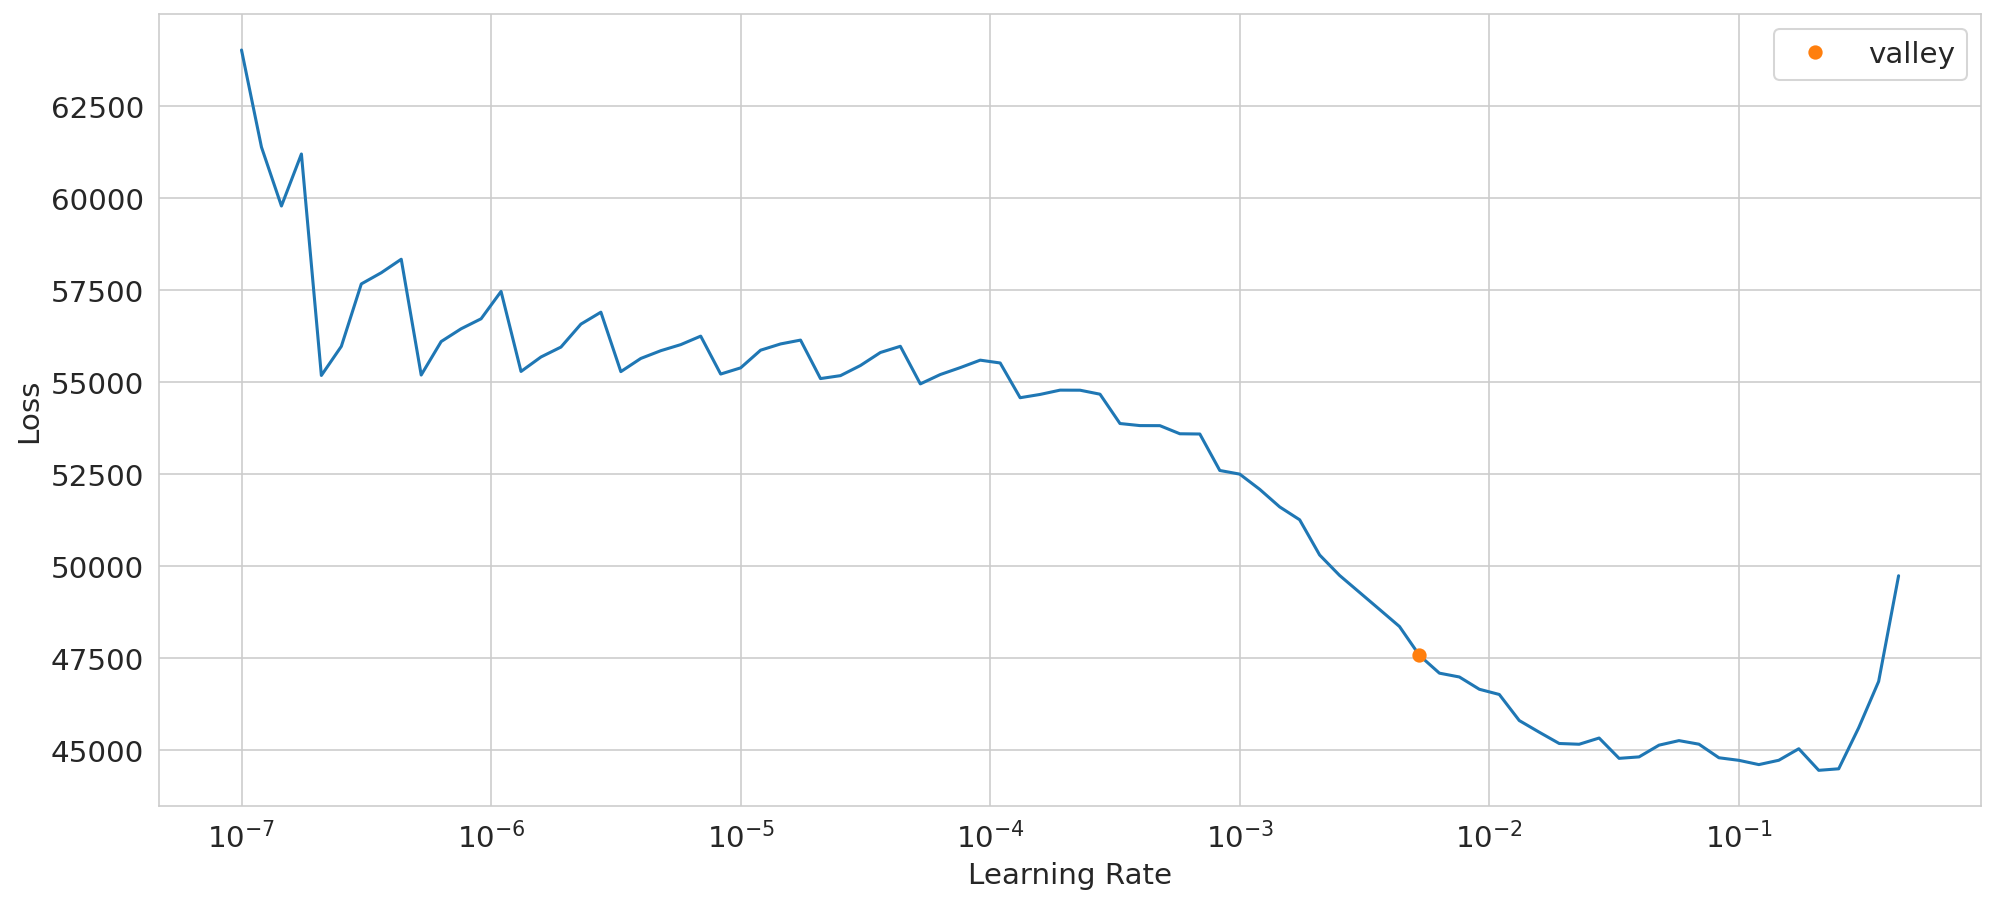

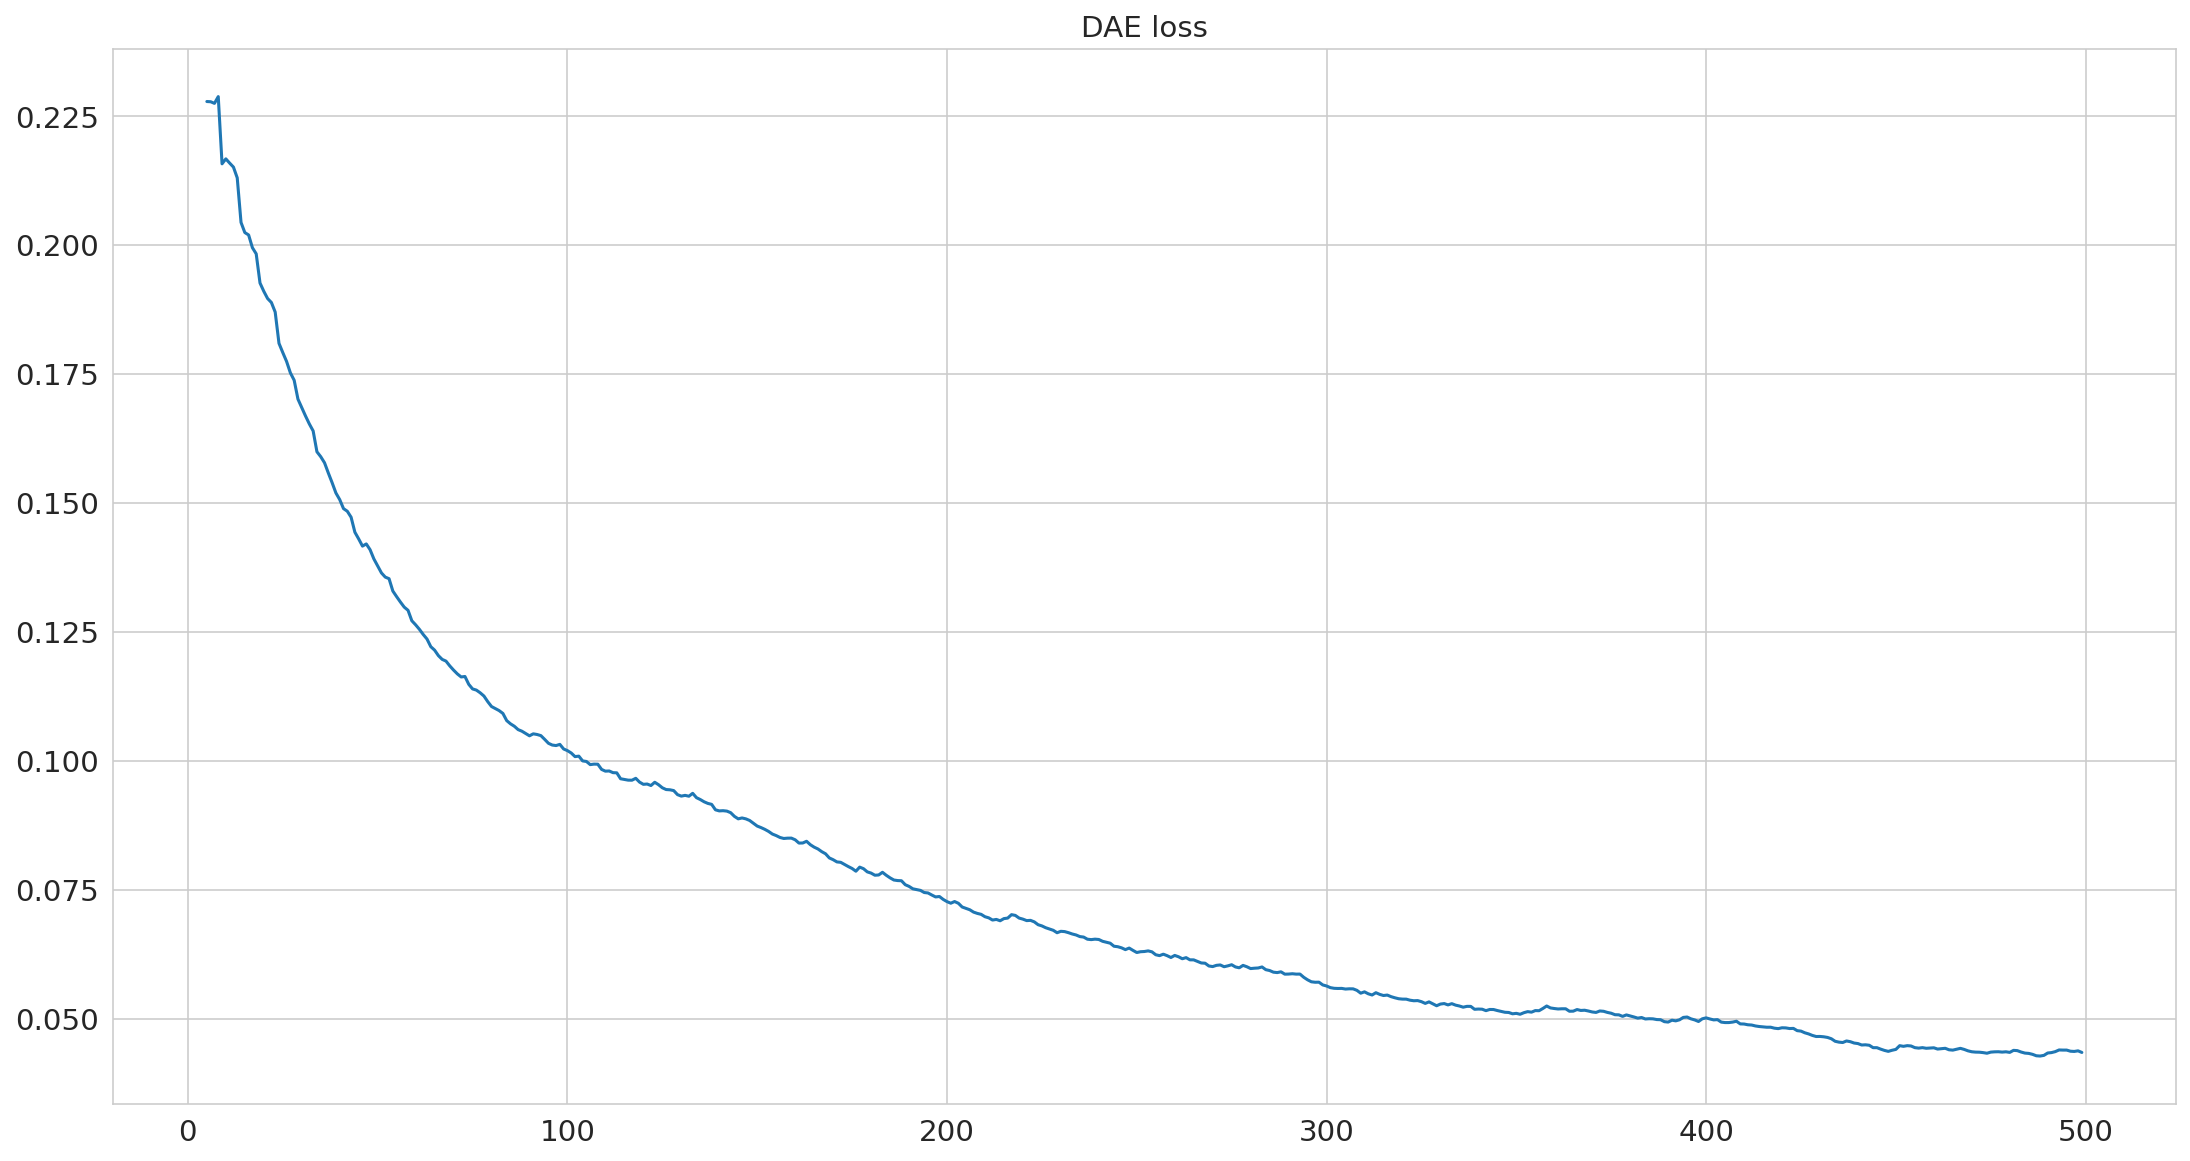

In [19]:
for x in range(1,11):
    fn_intensities = ('../../Data/CPTAC_data/CPTAC_MISTOT10_MNAR50_' + str(x) + '.csv')
    df = pd.read_csv(fn_intensities, index_col=0)
    df = df.T
    
    start = time.time()
    model = AETransformer(
        model='VAE', # or 'VAE'
        hidden_layers=[512,],
        latent_dim=50, # dimension of joint sample and item embedding
        batch_size=10,
    )
    
    
    model.fit(df,
              cuda=False,
              epochs_max=100,
              )
    
    df_imputed = model.transform(df)
    
    end = time.time()
    
    print(end - start)
    
    df_imputed.to_csv("Output/VAE_default_MISTOT10_MNAR50_" + str(x) + ".csv")

/data/gent/442/vsc44202/.local/lib/python3.11/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,time
0,54036.523438,None,00:00
1,50625.257812,None,00:00
2,46973.417969,None,00:00
3,44015.949219,None,00:00
4,41035.972656,None,00:00
5,38281.714844,None,00:00
6,36499.785156,None,00:00
7,34875.968750,None,00:00
8,33131.250000,None,00:00
9,31663.234375,None,00:00


40.94983458518982


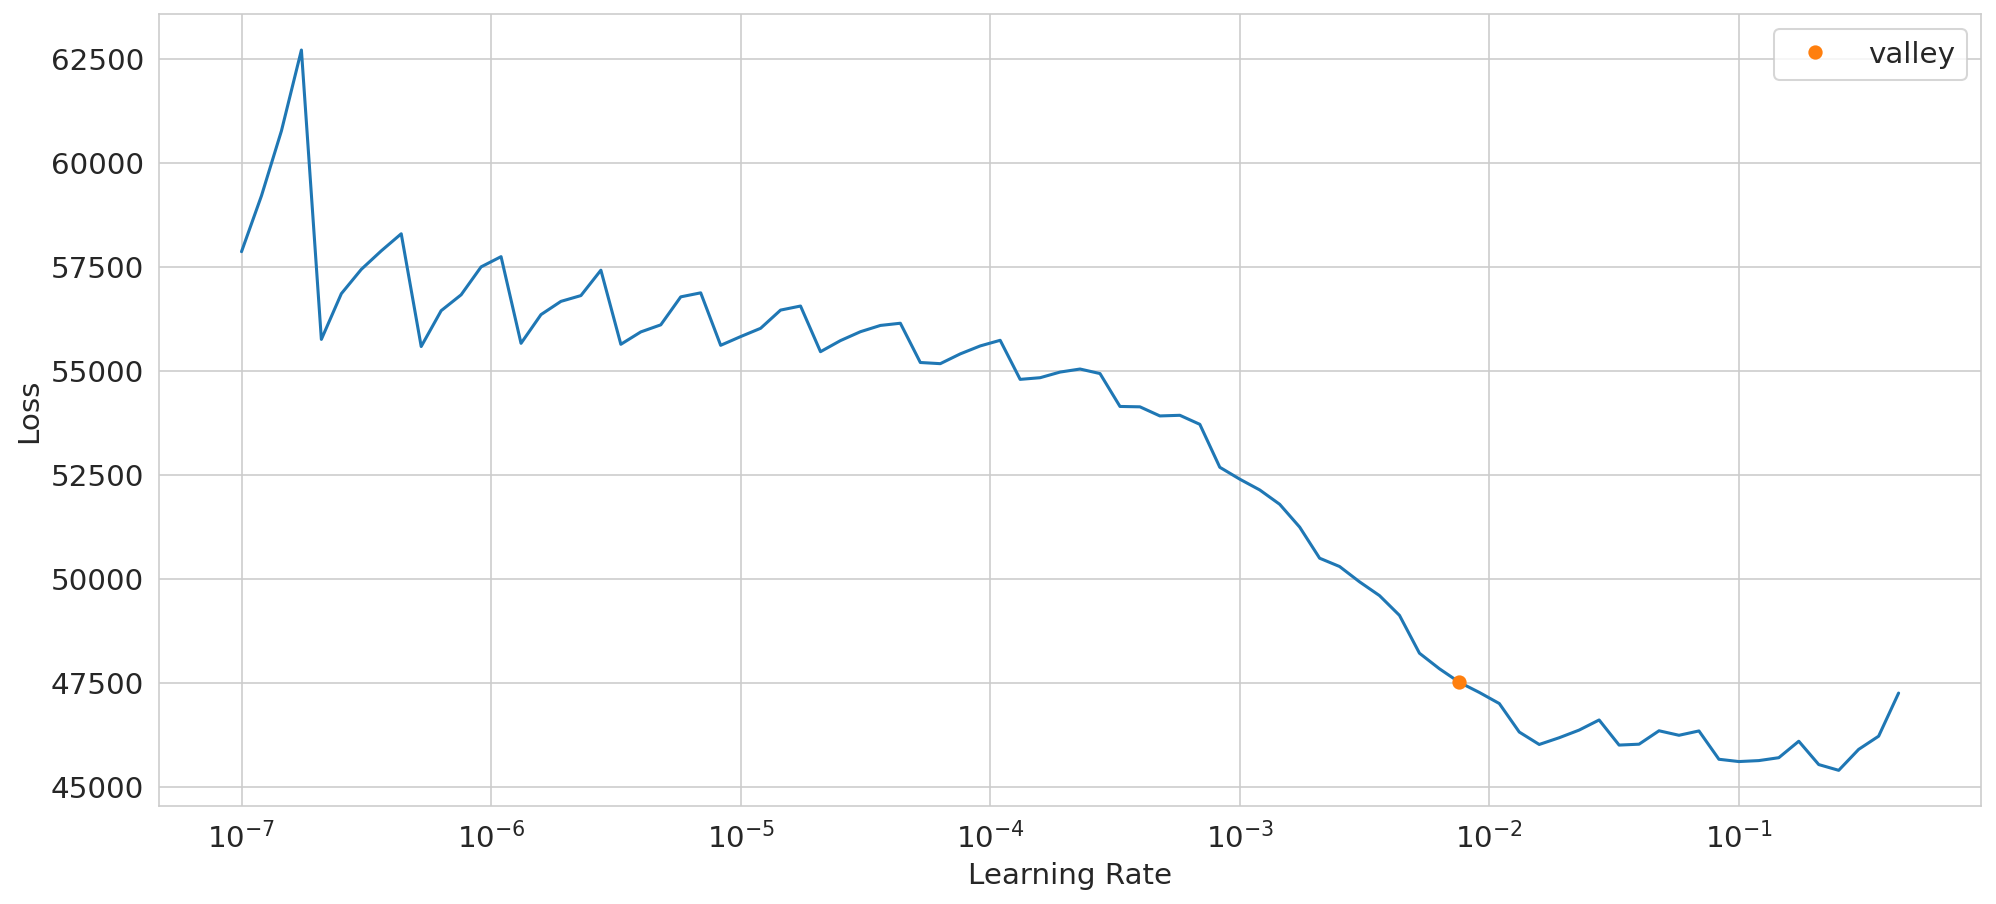

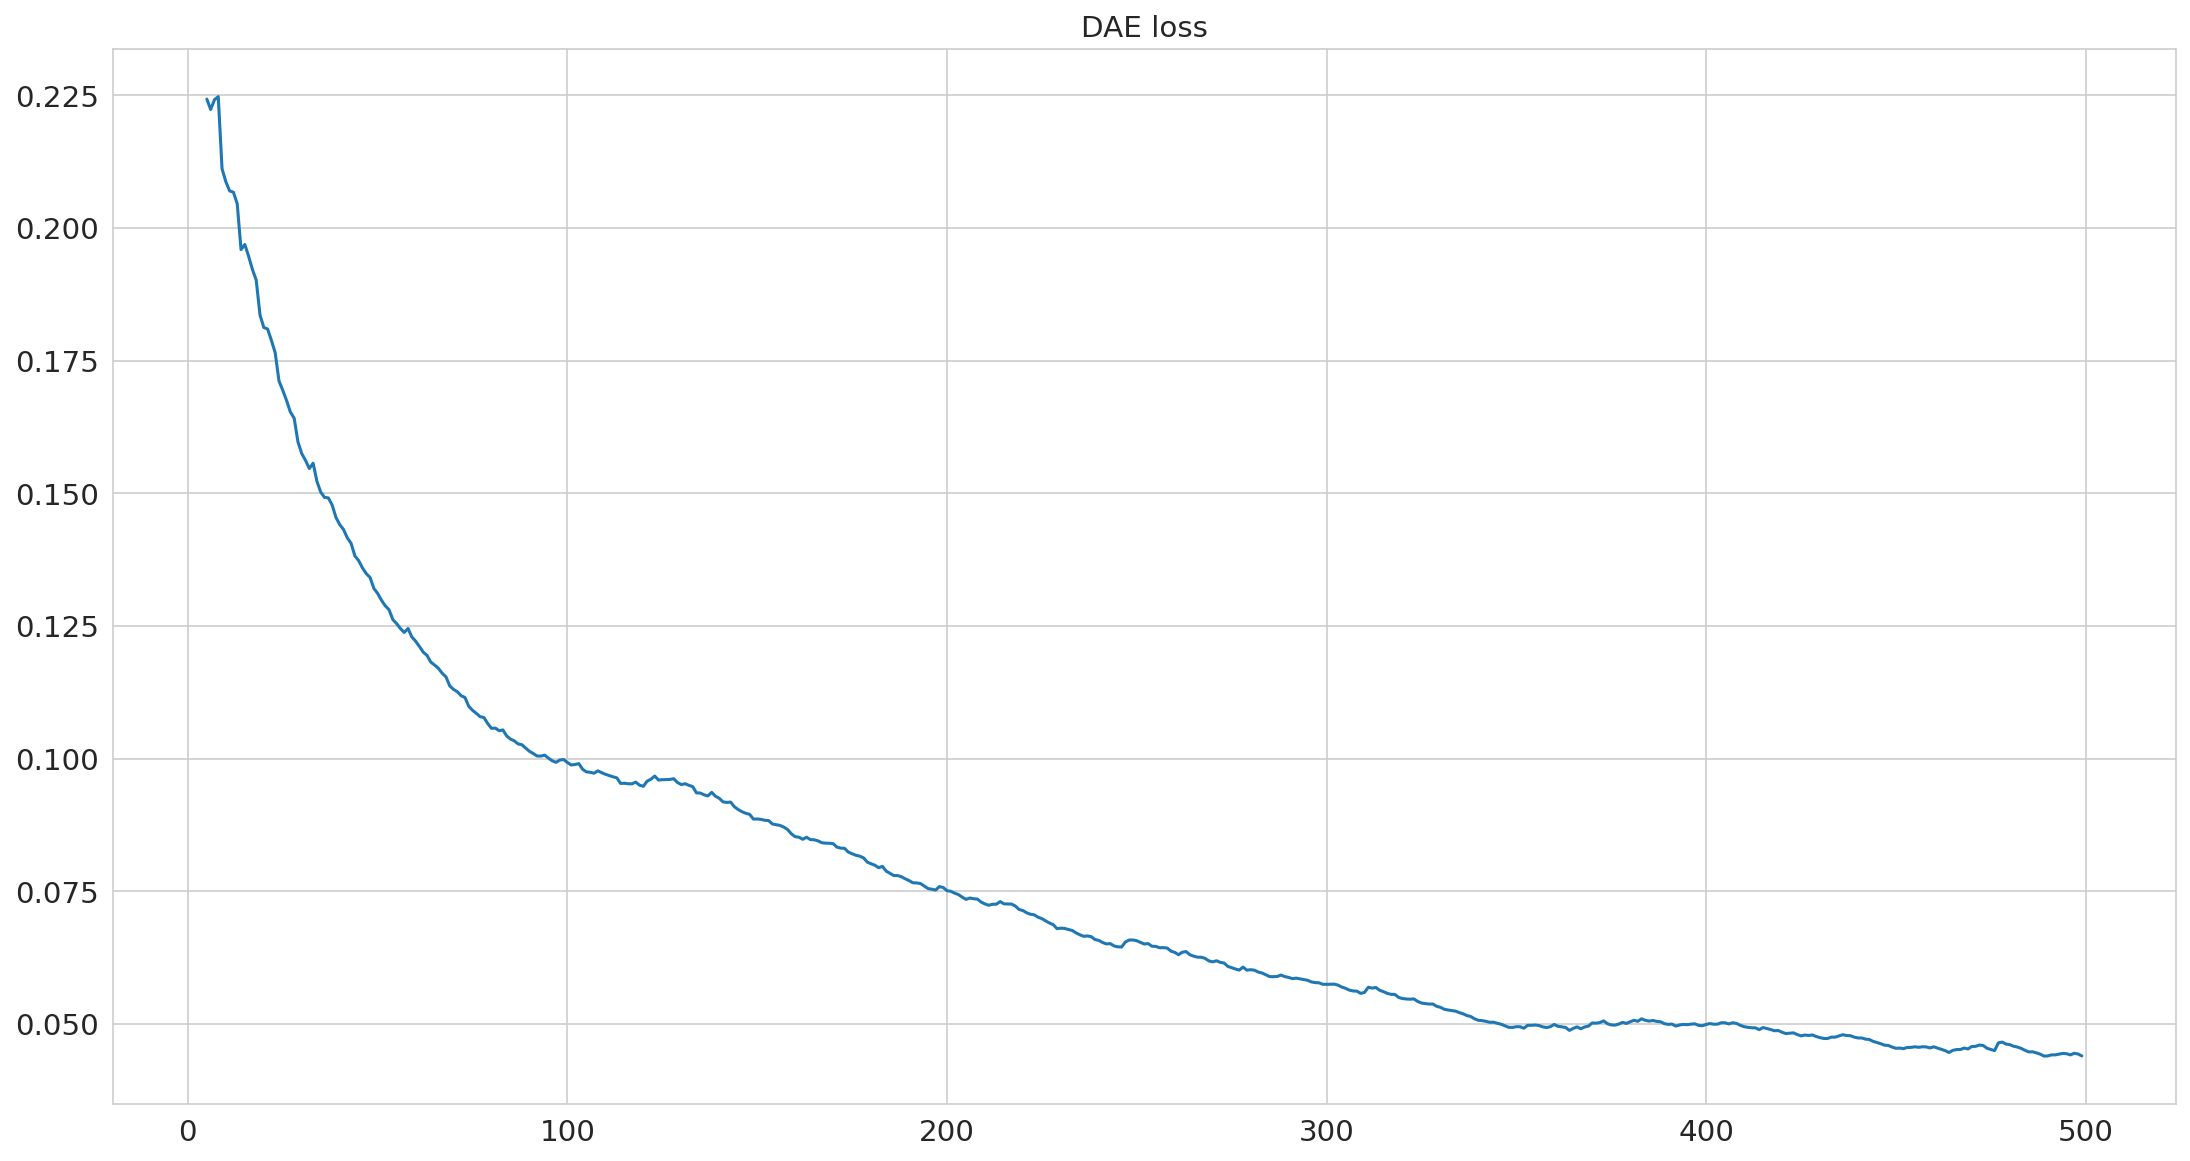

In [20]:
for x in range(1,11):
    fn_intensities = ('../../Data/CPTAC_data/CPTAC_MISTOT10_MNAR75_' + str(x) + '.csv')
    df = pd.read_csv(fn_intensities, index_col=0)
    df = df.T
    
    start = time.time()
    model = AETransformer(
        model='VAE', # or 'VAE'
        hidden_layers=[512,],
        latent_dim=50, # dimension of joint sample and item embedding
        batch_size=10,
    )
    
    
    model.fit(df,
              cuda=False,
              epochs_max=100,
              )
    
    df_imputed = model.transform(df)
    
    end = time.time()
    
    print(end - start)
    
    df_imputed.to_csv("Output/VAE_default_MISTOT10_MNAR75_" + str(x) + ".csv")